In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms
import numpy as np
from datetime import datetime

In [2]:
train_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

test_dataset = torchvision.datasets.CIFAR10(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


In [3]:
train_dataset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
train_dataset.data.shape

(50000, 32, 32, 3)

In [16]:
type(train_dataset.targets)

list

In [17]:
K = len(set(train_dataset.targets))
print(f"Number of classes: {K}")

Number of classes: 10


In [18]:
# Data Loader

batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# The data transformer maps the data to (0, 1)
# and also moved the color channel before height/width
tmp_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=1,
    shuffle=True
)

for x, y in tmp_loader:
  print(x)
  print(x.shape)
  break

tensor([[[[0.5922, 0.5529, 0.5647,  ..., 0.6784, 0.6510, 0.6235],
          [0.7255, 0.6980, 0.6745,  ..., 0.7725, 0.7373, 0.7686],
          [0.7098, 0.7137, 0.7294,  ..., 0.7725, 0.8039, 0.8314],
          ...,
          [0.6118, 0.6157, 0.6706,  ..., 0.7216, 0.6706, 0.6824],
          [0.6118, 0.6157, 0.6118,  ..., 0.6706, 0.6549, 0.6706],
          [0.6078, 0.6118, 0.6157,  ..., 0.7020, 0.6706, 0.6941]],

         [[0.5451, 0.5059, 0.5176,  ..., 0.6392, 0.6118, 0.5922],
          [0.6784, 0.6510, 0.6275,  ..., 0.7333, 0.6980, 0.7373],
          [0.6627, 0.6667, 0.6824,  ..., 0.7333, 0.7647, 0.8000],
          ...,
          [0.5765, 0.5765, 0.6353,  ..., 0.6824, 0.6314, 0.6510],
          [0.5882, 0.5882, 0.5843,  ..., 0.6314, 0.6157, 0.6392],
          [0.5882, 0.5922, 0.5961,  ..., 0.6627, 0.6314, 0.6627]],

         [[0.5922, 0.5529, 0.5647,  ..., 0.6706, 0.6431, 0.6157],
          [0.7255, 0.6980, 0.6745,  ..., 0.7647, 0.7294, 0.7569],
          [0.7098, 0.7137, 0.7294,  ..., 0

In [23]:
# Define the model
class CNN(nn.Module):
  def __init__(self, num_of_classes):
    super(CNN, self).__init__()
    
    # define the conv layers
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=2) 
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=2)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=2)

    # define the linear layers
    self.fc1 = nn.Linear(128 * 3 * 3, 1024)
    self.fc2 = nn.Linear(1024, num_of_classes)

  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.relu(self.conv2(X))
    X = F.relu(self.conv3(X))
    X = X.view(-1, 128 * 3 * 3)
    X = F.dropout(X, p=0.5)
    X = F.relu(self.fc1(X))
    X = F.dropout(X, p=0.2)
    X = self.fc2(X)
    return X

In [24]:
model = CNN(K)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
  (fc1): Linear(in_features=1152, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=10, bias=True)
)

In [25]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [26]:
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for i in range(epochs):
    model.train()
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      # move data to GPU
      inputs, targets = inputs.to(device), targets.to(device)

      # zero the parameter gradients
      optimizer.zero_grad()

      # Forward Pass
      outputs = model(inputs)
      loss = criterion(outputs, targets)

      # Backward and Optimize
      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())
    
    # Get train loss and test loss
    train_losses[i] = np.mean(train_loss)

    model.eval()
    test_loss = []

    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    
    test_losses[i] = np.mean(test_loss)

    dt = datetime.now() - t0
    print(f"Epoch: {i+1} / {epochs}, Train Loss: {train_losses[i]:.4f}, Test Loss: {test_losses[i]:.4f}, Duration: {dt}")

  return train_losses, test_losses

In [27]:
train_losses, test_losses = batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs=15)

Epoch: 1 / 15, Train Loss: 1.6872, Test Loss: 1.4763, Duration: 0:00:14.137173
Epoch: 2 / 15, Train Loss: 1.3984, Test Loss: 1.3260, Duration: 0:00:08.888728
Epoch: 3 / 15, Train Loss: 1.2848, Test Loss: 1.2609, Duration: 0:00:08.893326
Epoch: 4 / 15, Train Loss: 1.2034, Test Loss: 1.1805, Duration: 0:00:18.546351
Epoch: 5 / 15, Train Loss: 1.1298, Test Loss: 1.1503, Duration: 0:00:18.278215
Epoch: 6 / 15, Train Loss: 1.0666, Test Loss: 1.0951, Duration: 0:00:14.033140
Epoch: 7 / 15, Train Loss: 1.0075, Test Loss: 1.0596, Duration: 0:00:10.096719
Epoch: 8 / 15, Train Loss: 0.9669, Test Loss: 1.0858, Duration: 0:00:13.087493
Epoch: 9 / 15, Train Loss: 0.9183, Test Loss: 1.0538, Duration: 0:00:11.987866
Epoch: 10 / 15, Train Loss: 0.8851, Test Loss: 1.0197, Duration: 0:00:08.538317
Epoch: 11 / 15, Train Loss: 0.8551, Test Loss: 0.9951, Duration: 0:00:08.822202
Epoch: 12 / 15, Train Loss: 0.8186, Test Loss: 1.0188, Duration: 0:00:08.870449
Epoch: 13 / 15, Train Loss: 0.7821, Test Loss: 1.

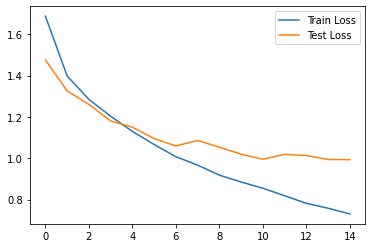

In [28]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend();

In [29]:
# Accuracy

model.eval()
n_correct = 0.
n_total = 0.

for inputs, targets in train_loader:

  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]  

train_acc = n_correct / n_total

n_correct = 0.
n_total = 0.

for inputs, targets in test_loader:

  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get prediction
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]  

test_acc = n_correct / n_total

print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")


Train Accuracy: 0.7577, Test Accuracy: 0.6613


In [30]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 31.8 MB/s eta 0:00:00


In [37]:
# Get all the train predictions in an array and plot confusion matrix

x_test = test_dataset.data
y_test = test_dataset.targets
p_test = np.array([])

for inputs, targets in test_loader:
  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Forward Pass
  outputs = model(inputs)

  # Get prediction
  # torch.max return both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Concatenate the predictions
  p_test = np.concatenate((p_test, predictions.cpu().numpy())) 

In [38]:
# Confusion Matrix
from torchmetrics import ConfusionMatrix
confmat = ConfusionMatrix(task="multiclass", num_classes=10)
confmat(torch.Tensor(p_test), torch.Tensor(y_test))

tensor([[681,  22,  70,  31,  27,  13,   4,  15, 106,  31],
        [ 32, 757,  14,  16,  17,  11,  13,  10,  25, 105],
        [ 45,   4, 571,  65, 112,  77,  56,  50,  16,   4],
        [ 14,   4,  84, 472,  72, 209,  80,  40,  10,  15],
        [ 13,   2,  81,  79, 631,  48,  49,  83,  11,   3],
        [ 12,   2,  77, 202,  67, 536,  24,  65,   9,   6],
        [  8,   3,  46,  84,  63,  44, 730,   9,   7,   6],
        [ 15,   3,  41,  35,  82,  74,   8, 728,   5,   9],
        [ 64,  30,  20,  31,  12,  17,   8,   8, 789,  21],
        [ 42,  90,  16,  20,   9,  18,  17,  43,  40, 705]])

In [39]:
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

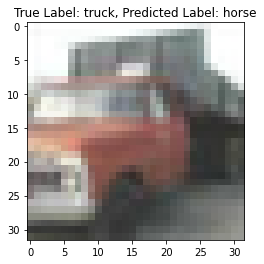

In [43]:
p_test = p_test.astype(np.uint8)
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(32, 32, 3))
plt.title(f"True Label: {labels[y_test[i]]}, Predicted Label: {labels[p_test[i]]}");